In [1]:
#IMPORT STATEMENTS
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#LOAD THE DATASET
df=pd.read_csv("/kaggle/input/uncleaned-laptop-price-dataset/laptopData.csv")

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [5]:
df.shape

(1303, 12)

In [6]:
df.isna().sum()

Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [7]:
# Drop rows with missing values
df.dropna(inplace=True)

# **Find the relationship b/w Operating System and Price of the laptops**

In [8]:
df["OpSys"].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux',
       'Windows 10 S', 'Chrome OS', 'Windows 7', 'Android'], dtype=object)

In [9]:
df.groupby("OpSys").mean("Price")

,Unnamed: 0,Price
OpSys,,
Android,1114.000000,29250.720000
Chrome OS,772.370370,29495.018667
Linux,624.852459,32919.414846
Mac OS X,695.750000,67285.780200
No OS,555.984127,31892.934400
Windows 10,649.446991,62214.308452
Windows 10 S,354.375000,68543.654400
Windows 7,1036.755556,89864.783040
macOS,55.230769,93220.327385


In [10]:
OS=df.groupby("OpSys")["Price"].mean().sort_values()
X=OS.index
Y=OS.values

Text(0.5, 1.0, 'Find the relationship b/w Operating System and Price of the laptops')

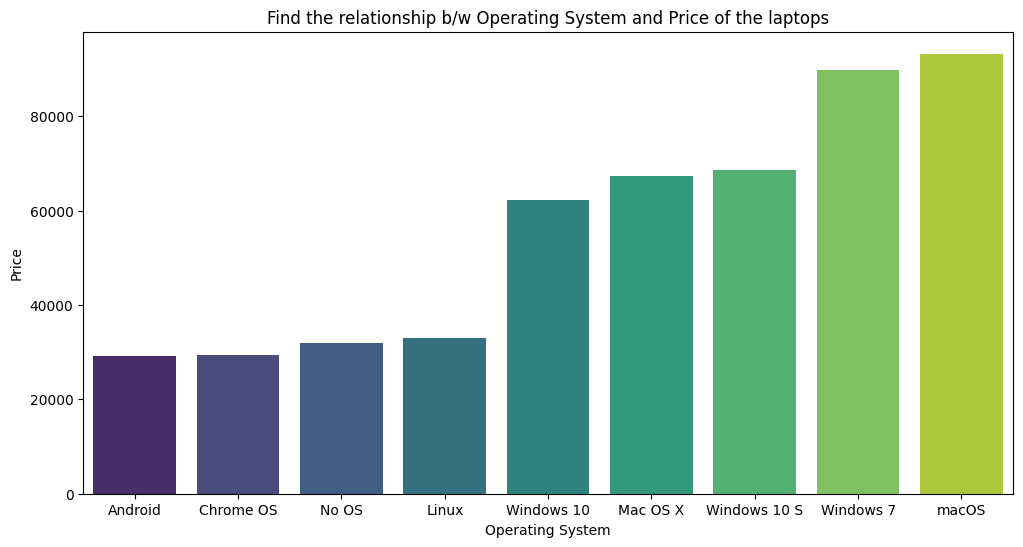

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(x=X,y=Y,palette='viridis') # skip hue as it give issue withe size of bar in kaggle
plt.xlabel("Operating System")
plt.ylabel("Price")
plt.title("Find the relationship b/w Operating System and Price of the laptops")

Text(0.5, 1.0, 'Find the relationship b/w Operating System and Price of the laptops')

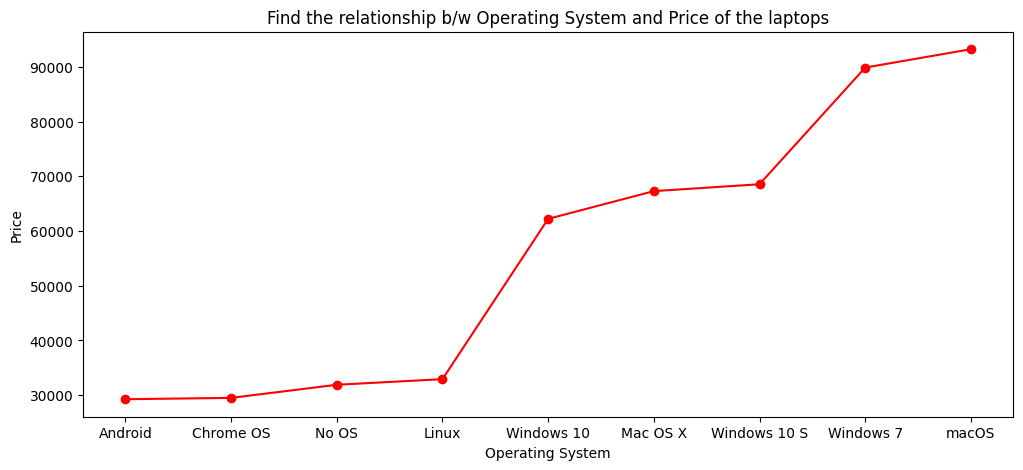

In [12]:
plt.figure(figsize=(12,5))
plt.plot(X,Y,color="red",marker='o')
plt.xlabel("Operating System")
plt.ylabel("Price")
plt.title("Find the relationship b/w Operating System and Price of the laptops")

# **Check the Weight Distribution of laptops and also Find relation b/w weights and price**

In [13]:
df["Weight"].head()

0    1.37kg
1    1.34kg
2    1.86kg
3    1.83kg
4    1.37kg
Name: Weight, dtype: object

In [14]:
def clean(text):
    text = str(text)
    text = re.sub('[^0-9.]', '', text)
    return text

In [15]:
df["Weight"] = df["Weight"].apply(clean)

In [16]:
df["Weight"]=pd.to_numeric(df["Weight"])

In [17]:
df["Weight"].head(1)

0    1.37
Name: Weight, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Weight Distribution of Laptops')

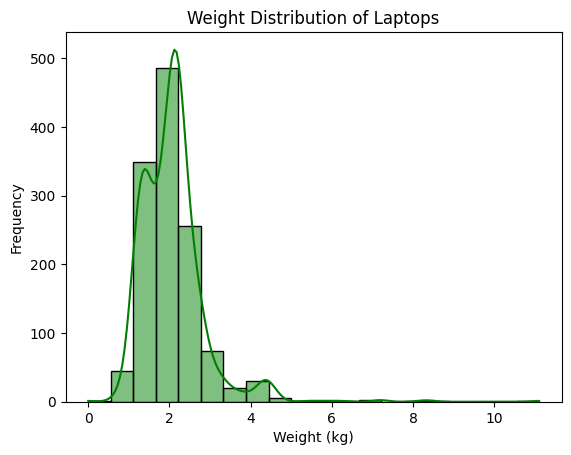

In [18]:
# Plot the histogram for laptop weights
sns.histplot(df['Weight'], bins=20, kde=True, color='green')

# Add labels and title
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.title('Weight Distribution of Laptops')

In [19]:
bins=[1,2,3,4,5,6,7,8,9]
df['Weight-Range'] = pd.cut(df['Weight'], bins=bins)

/tmp/ipykernel_37/3367324207.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Weight_Group = df.groupby("Weight-Range")["Price"].mean()
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0, 0.5, 'Price')

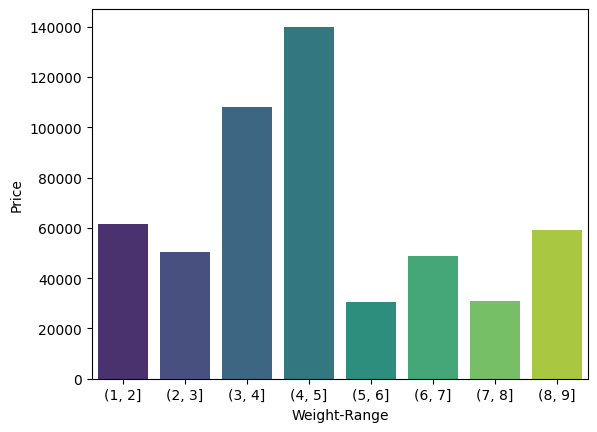

In [20]:
Weight_Group = df.groupby("Weight-Range")["Price"].mean()

# Getting the index
X=Weight_Group.index
Y=Weight_Group.values

# Creating the barplot
sns.barplot(x=X, y=Y,palette="viridis")
plt.ylabel("Price")

# **Number of Laptops with Ram with price**

Text(0.5, 0, 'Price')

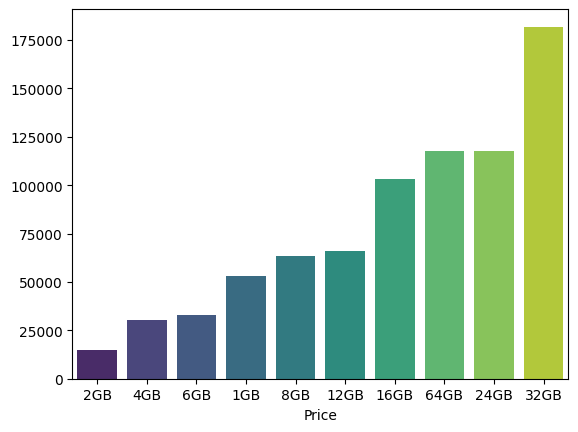

In [21]:
Ram=df.groupby("Ram")["Price"].mean().sort_values()
X=Ram.index
Y=Ram.values
sns.barplot(x=X,y=Y,palette="viridis")
plt.xlabel("Price")

Text(0.5, 1.0, 'Number of Laptops with Ram with price')

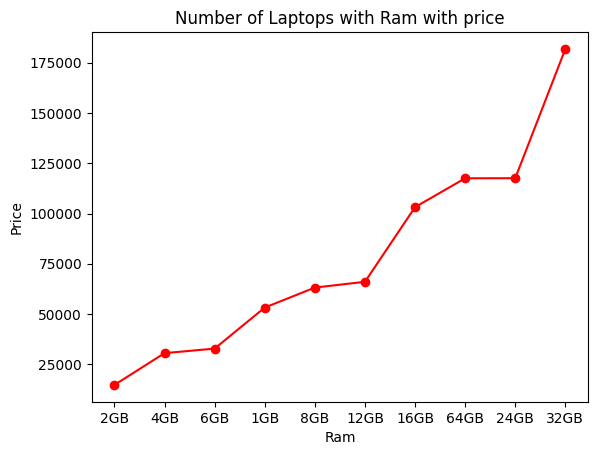

In [22]:
plt.plot(X,Y,color="red",marker='o')
plt.xlabel("Ram")
plt.ylabel("Price")
plt.title("Number of Laptops with Ram with price")

# **6. Is CPU Brand affecting the price of laptops**

In [23]:
def categorize_cpu_brand(text):
  text=str(text)
  if "Intel" in text:
     return "Intel"

  elif "AMD" in text:
       return "AMD"

  elif "Samsung" in text:
       return "Samsung"

In [24]:
df["CPU Brands"]=df["Cpu"].apply(categorize_cpu_brand)
df.groupby("CPU Brands")["Price"].mean()

CPU Brands
AMD        29870.839045
Intel      61517.890723
Samsung    35111.520000
Name: Price, dtype: float64

Text(0, 0.5, 'PRICE')

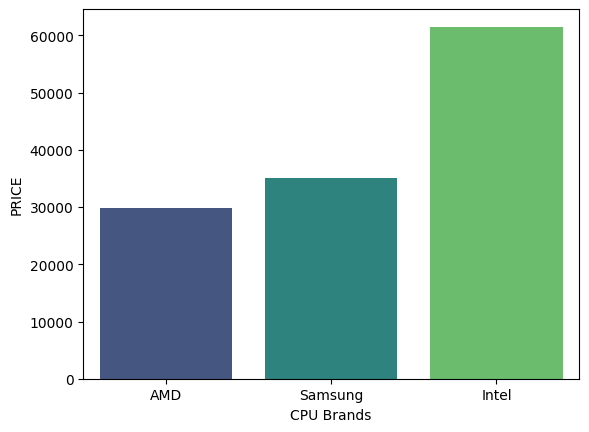

In [25]:
CPU=df.groupby("CPU Brands")["Price"].mean().sort_values(ascending=True)
X=CPU.index
Y=CPU.values
sns.barplot(x=X,y=Y,palette="viridis")
plt.ylabel("PRICE")

# **Find PPI<br> ( ppi = (√(w²+h²))/d )<br>**
 w-screen width<br>
 h- Screen height<br>
 D- Inches columns

In [26]:
import re

def extract_dimensions(text):
  text=str(text)
  match=re.search(r'(\d+)x(\d+)',text)
  if match:
     width,height=match.groups()
     width=int(width)
     height=int(height)
     return pd.Series([width, height]) # Return a Series with two elements
  else:
    return pd.Series([None, None]) # Return a Series with two None values

In [27]:
df[["Width", "Height"]] = df["ScreenResolution"].apply(extract_dimensions) # Assign to two columns at once

In [28]:
df.head(2)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Weight-Range,CPU Brands,Width,Height
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,"(1, 2]",Intel,2560,1600
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,"(1, 2]",Intel,1440,900


In [29]:
#( ppi = (√(w²+h²))/d )
def ppi(w,h,d):
  sqt=np.sqrt((w**2)+(h**2))
  return sqt/d

In [30]:
def clean(text):
    text = str(text)
    text = re.sub('[^0-9]', '', text)
    return text

In [31]:
df["Inches"]=df["Inches"].apply(clean)
d=pd.to_numeric(df["Inches"])
w=df["Width"]
h=df["Height"]

df["ppi"]=ppi(w,h,d)

In [32]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Weight-Range,CPU Brands,Width,Height,ppi
0,0.0,Apple,Ultrabook,133,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,"(1, 2]",Intel,2560,1600,22.698300
1,1.0,Apple,Ultrabook,133,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,"(1, 2]",Intel,1440,900,12.767794
2,2.0,HP,Notebook,156,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,"(1, 2]",Intel,1920,1080,14.121200
3,3.0,Apple,Ultrabook,154,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,"(1, 2]",Intel,2880,1800,22.053462
4,4.0,Apple,Ultrabook,133,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,"(1, 2]",Intel,2560,1600,22.698300


Text(0, 0.5, 'Price')

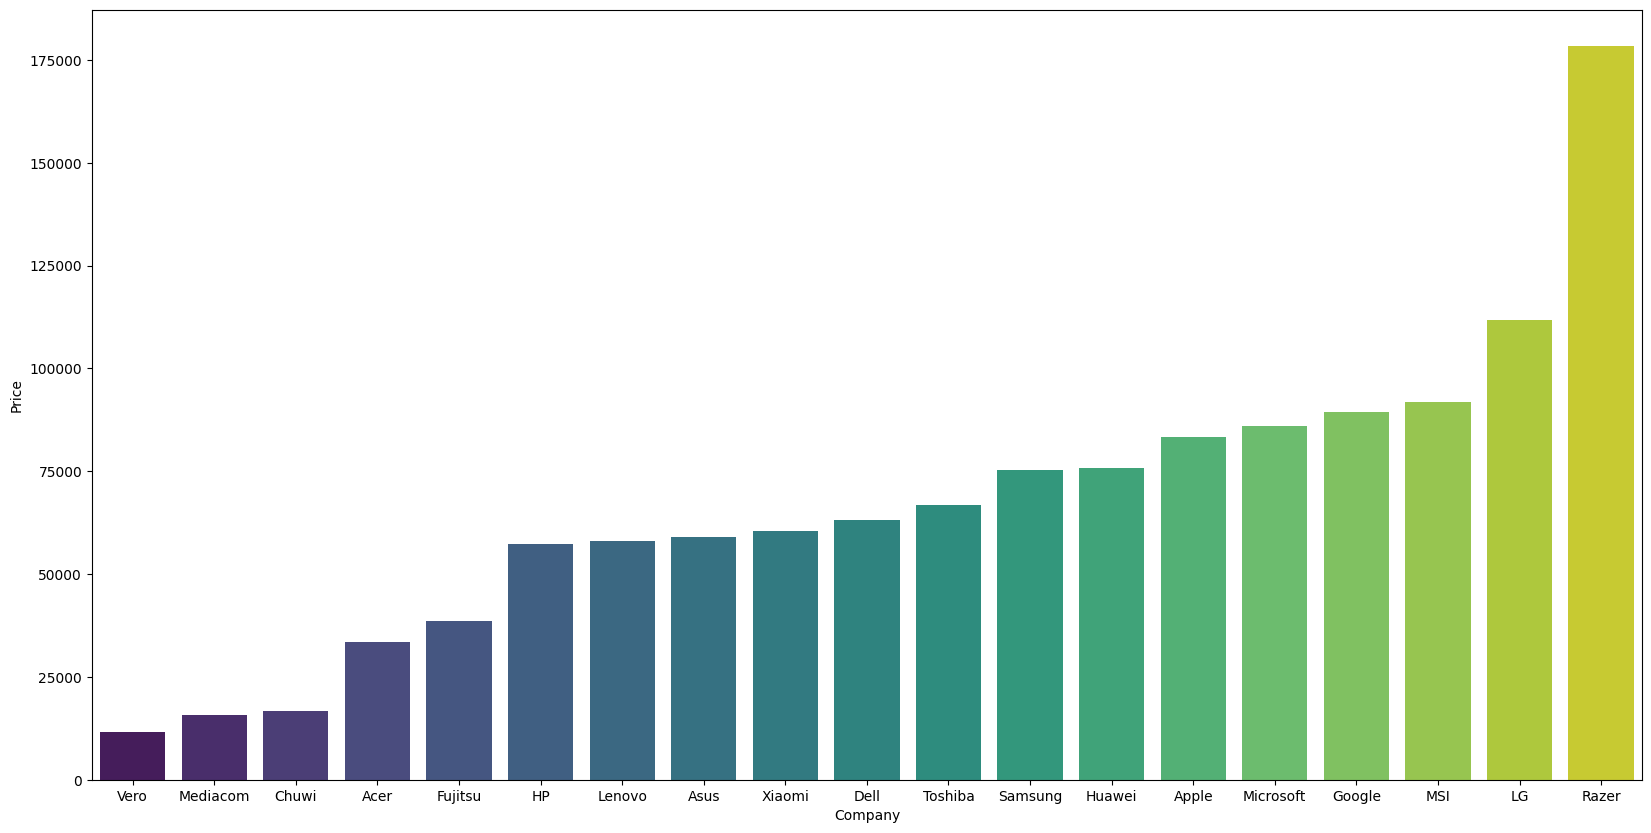

In [33]:
company=df.groupby("Company")["Price"].mean().sort_values()
X=company.index
Y=company.values

plt.figure(figsize=(20,10))
sns.barplot(x=X,y=Y,palette="viridis")
plt.ylabel("Price")

# **Distribution of Company**

In [34]:
company_count=df["Company"].value_counts()
company_count

Company
Lenovo       290
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: count, dtype: int64

Text(0.5, 1.0, 'Company Distribution/Demand')

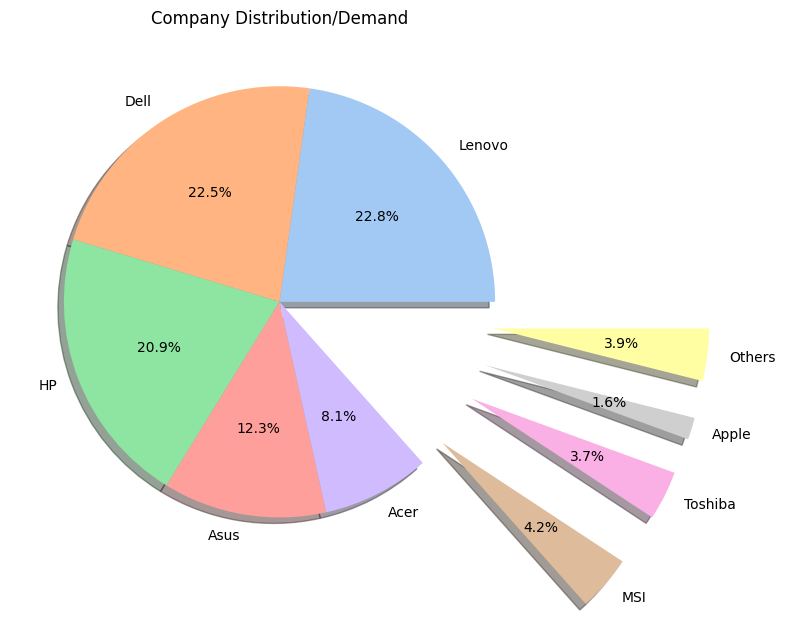

In [35]:
company_count = df["Company"].value_counts()

# Create a new Series for companies with counts >= 9
company_count_updated = company_count[company_count > 9]

# Sum the companies with counts < 9 and add them as "Others"
others_count = company_count[company_count <= 9].sum()
company_count_updated['Others'] = others_count

# Pie chart
plt.figure(figsize=(7,7))
plt.pie(company_count_updated.values, labels=company_count_updated.index,autopct='%1.1f%%',explode=[0,0,0,0,0,1,1,1,1],shadow=True,colors=sns.color_palette("pastel"))
plt.title('Company Distribution/Demand')

Text(0.5, 1.0, 'Number of Laptops of each company')

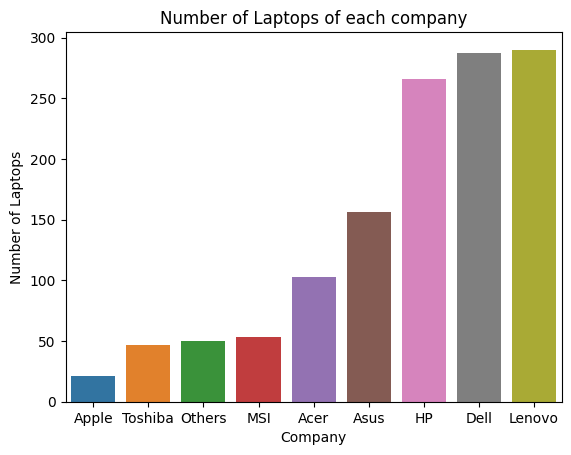

In [36]:
company_count_updated=company_count_updated.sort_values()
Y=company_count_updated.values
X=company_count_updated.index
sns.barplot(x=X,y=Y)
plt.ylabel("Number of Laptops")
plt.title("Number of Laptops of each company")

# **Comparing Price of Laptop type**

Text(0, 0.5, 'Prices')

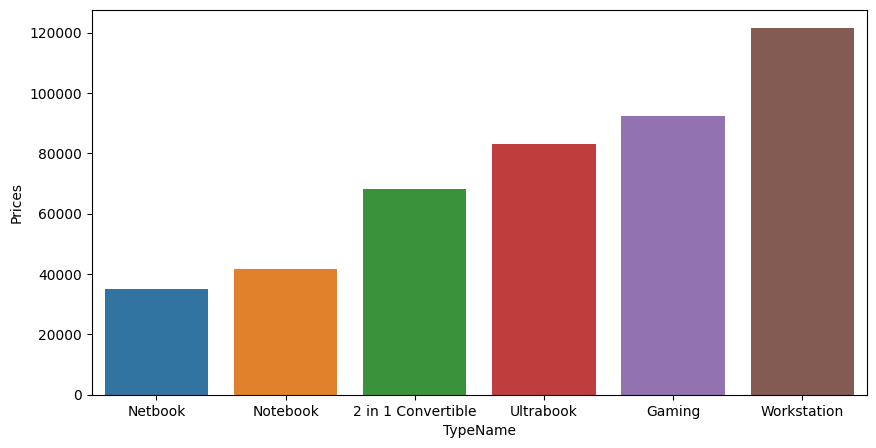

In [40]:
type=df.groupby("TypeName")["Price"].mean().sort_values()
X=type.index
Y=type.values
plt.figure(figsize=(10,5))
sns.barplot(x=X,y=Y)
plt.ylabel("Prices")